In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

In [4]:
df_min=df[df['8']==1]

In [5]:
df_min.to_csv('yeast1_minority_train.csv',index=False)
df_min=pd.read_csv('yeast1_minority_train.csv')

In [6]:
df_majority=df[df['8']==0]
df_majority.to_csv('yeast1_majority_train.csv',index=False)
df_majority=pd.read_csv('yeast1_majority_train.csv')

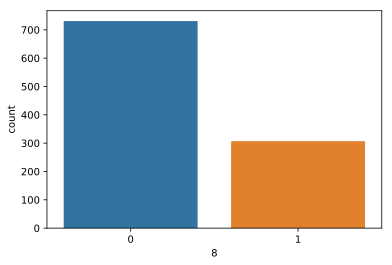

In [7]:
%matplotlib inline
sns.countplot(x='8',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(301, 5, 9)
(301, 9)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(9))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2400      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 189       
Total params: 2,589
Trainable params: 2,589
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=1000,verbose=1)

Epoch 1/1000
180/180 [==============================] - 3s 16ms/step - loss: 0.2104
Epoch 2/1000
180/180 [==============================] - 0s 596us/step - loss: 0.1754
Epoch 3/1000
180/180 [==============================] - 0s 546us/step - loss: 0.1452
Epoch 4/1000
180/180 [==============================] - 0s 535us/step - loss: 0.1198
Epoch 5/1000
180/180 [==============================] - 0s 629us/step - loss: 0.0978
Epoch 6/1000
180/180 [==============================] - 0s 668us/step - loss: 0.0785
Epoch 7/1000
180/180 [==============================] - 0s 524us/step - loss: 0.0619
Epoch 8/1000
180/180 [==============================] - 0s 524us/step - loss: 0.0478
Epoch 9/1000
180/180 [==============================] - 0s 685us/step - loss: 0.0368
Epoch 10/1000
180/180 [==============================] - 0s 1ms/step - loss: 0.0282
Epoch 11/1000
180/180 [==============================] - 0s 730us/step - loss: 0.0227
Epoch 12/1000
180/180 [==============================] - 0s 647us/

180/180 [==============================] - 0s 1ms/step - loss: 0.0172
Epoch 97/1000
180/180 [==============================] - 0s 861us/step - loss: 0.0172
Epoch 98/1000
180/180 [==============================] - 0s 836us/step - loss: 0.0172
Epoch 99/1000
180/180 [==============================] - 0s 766us/step - loss: 0.0172
Epoch 100/1000
180/180 [==============================] - 0s 771us/step - loss: 0.0172
Epoch 101/1000
180/180 [==============================] - 0s 824us/step - loss: 0.0172
Epoch 102/1000
180/180 [==============================] - 0s 936us/step - loss: 0.0172
Epoch 103/1000
180/180 [==============================] - 0s 805us/step - loss: 0.0172
Epoch 104/1000
180/180 [==============================] - 0s 657us/step - loss: 0.0172
Epoch 105/1000
180/180 [==============================] - 0s 579us/step - loss: 0.0172
Epoch 106/1000
180/180 [==============================] - 0s 546us/step - loss: 0.0172
Epoch 107/1000
180/180 [==============================] - 0s 51

180/180 [==============================] - 0s 546us/step - loss: 0.0168
Epoch 191/1000
180/180 [==============================] - 0s 596us/step - loss: 0.0168
Epoch 192/1000
180/180 [==============================] - 0s 551us/step - loss: 0.0168
Epoch 193/1000
180/180 [==============================] - 0s 568us/step - loss: 0.0167
Epoch 194/1000
180/180 [==============================] - 0s 551us/step - loss: 0.0167
Epoch 195/1000
180/180 [==============================] - 0s 579us/step - loss: 0.0167
Epoch 196/1000
180/180 [==============================] - 0s 551us/step - loss: 0.0167
Epoch 197/1000
180/180 [==============================] - 0s 598us/step - loss: 0.0168
Epoch 198/1000
180/180 [==============================] - 0s 568us/step - loss: 0.0168
Epoch 199/1000
180/180 [==============================] - 0s 596us/step - loss: 0.0168
Epoch 200/1000
180/180 [==============================] - 0s 582us/step - loss: 0.0167
Epoch 201/1000
180/180 [==============================] - 

180/180 [==============================] - 0s 529us/step - loss: 0.0165
Epoch 285/1000
180/180 [==============================] - 0s 608us/step - loss: 0.0164
Epoch 286/1000
180/180 [==============================] - 0s 685us/step - loss: 0.0165
Epoch 287/1000
180/180 [==============================] - 0s 671us/step - loss: 0.0164
Epoch 288/1000
180/180 [==============================] - 0s 582us/step - loss: 0.0165
Epoch 289/1000
180/180 [==============================] - 0s 549us/step - loss: 0.0164
Epoch 290/1000
180/180 [==============================] - 0s 564us/step - loss: 0.0165
Epoch 291/1000
180/180 [==============================] - 0s 548us/step - loss: 0.0165
Epoch 292/1000
180/180 [==============================] - 0s 538us/step - loss: 0.0165
Epoch 293/1000
180/180 [==============================] - 0s 602us/step - loss: 0.0164
Epoch 294/1000
180/180 [==============================] - 0s 565us/step - loss: 0.0165
Epoch 295/1000
180/180 [==============================] - 

180/180 [==============================] - 0s 819us/step - loss: 0.0162
Epoch 379/1000
180/180 [==============================] - 0s 765us/step - loss: 0.0163
Epoch 380/1000
180/180 [==============================] - 0s 707us/step - loss: 0.0162
Epoch 381/1000
180/180 [==============================] - 0s 702us/step - loss: 0.0162
Epoch 382/1000
180/180 [==============================] - 0s 680us/step - loss: 0.0163
Epoch 383/1000
180/180 [==============================] - 0s 702us/step - loss: 0.0163
Epoch 384/1000
180/180 [==============================] - 0s 676us/step - loss: 0.0162
Epoch 385/1000
180/180 [==============================] - 0s 688us/step - loss: 0.0162
Epoch 386/1000
180/180 [==============================] - 0s 652us/step - loss: 0.0162
Epoch 387/1000
180/180 [==============================] - 0s 649us/step - loss: 0.0162
Epoch 388/1000
180/180 [==============================] - 0s 640us/step - loss: 0.0162
Epoch 389/1000
180/180 [==============================] - 

180/180 [==============================] - 0s 869us/step - loss: 0.0162
Epoch 472/1000
180/180 [==============================] - 0s 825us/step - loss: 0.0161
Epoch 473/1000
180/180 [==============================] - 0s 822us/step - loss: 0.0161
Epoch 474/1000
180/180 [==============================] - 0s 741us/step - loss: 0.0160
Epoch 475/1000
180/180 [==============================] - 0s 802us/step - loss: 0.0160
Epoch 476/1000
180/180 [==============================] - 0s 919us/step - loss: 0.0160
Epoch 477/1000
180/180 [==============================] - 0s 892us/step - loss: 0.0161
Epoch 478/1000
180/180 [==============================] - 0s 886us/step - loss: 0.0160
Epoch 479/1000
180/180 [==============================] - 0s 768us/step - loss: 0.0161
Epoch 480/1000
180/180 [==============================] - 0s 763us/step - loss: 0.0160
Epoch 481/1000
180/180 [==============================] - 0s 746us/step - loss: 0.0160
Epoch 482/1000
180/180 [==============================] - 

180/180 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 566/1000
180/180 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 567/1000
180/180 [==============================] - 0s 978us/step - loss: 0.0159
Epoch 568/1000
180/180 [==============================] - 0s 836us/step - loss: 0.0159
Epoch 569/1000
180/180 [==============================] - 0s 774us/step - loss: 0.0158
Epoch 570/1000
180/180 [==============================] - 0s 677us/step - loss: 0.0159
Epoch 571/1000
180/180 [==============================] - 0s 646us/step - loss: 0.0159
Epoch 572/1000
180/180 [==============================] - 0s 568us/step - loss: 0.0159
Epoch 573/1000
180/180 [==============================] - 0s 719us/step - loss: 0.0159
Epoch 574/1000
180/180 [==============================] - 0s 602us/step - loss: 0.0158
Epoch 575/1000
180/180 [==============================] - 0s 568us/step - loss: 0.0159
Epoch 576/1000
180/180 [==============================] - 0s 5

180/180 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 660/1000
180/180 [==============================] - 0s 969us/step - loss: 0.0157
Epoch 661/1000
180/180 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 662/1000
180/180 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 663/1000
180/180 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 664/1000
180/180 [==============================] - 0s 992us/step - loss: 0.0158
Epoch 665/1000
180/180 [==============================] - 0s 894us/step - loss: 0.0157
Epoch 666/1000
180/180 [==============================] - 0s 788us/step - loss: 0.0158
Epoch 667/1000
180/180 [==============================] - 0s 705us/step - loss: 0.0158
Epoch 668/1000
180/180 [==============================] - 0s 972us/step - loss: 0.0159
Epoch 669/1000
180/180 [==============================] - 0s 641us/step - loss: 0.0158
Epoch 670/1000
180/180 [==============================] - 0s 673us

180/180 [==============================] - 0s 710us/step - loss: 0.0155
Epoch 754/1000
180/180 [==============================] - 0s 646us/step - loss: 0.0155
Epoch 755/1000
180/180 [==============================] - 0s 635us/step - loss: 0.0156
Epoch 756/1000
180/180 [==============================] - 0s 613us/step - loss: 0.0156
Epoch 757/1000
180/180 [==============================] - 0s 624us/step - loss: 0.0156
Epoch 758/1000
180/180 [==============================] - 0s 613us/step - loss: 0.0155
Epoch 759/1000
180/180 [==============================] - 0s 629us/step - loss: 0.0156
Epoch 760/1000
180/180 [==============================] - 0s 629us/step - loss: 0.0155
Epoch 761/1000
180/180 [==============================] - 0s 613us/step - loss: 0.0155
Epoch 762/1000
180/180 [==============================] - 0s 646us/step - loss: 0.0155
Epoch 763/1000
180/180 [==============================] - 0s 607us/step - loss: 0.0157
Epoch 764/1000
180/180 [==============================] - 

180/180 [==============================] - 0s 769us/step - loss: 0.0153
Epoch 848/1000
180/180 [==============================] - 0s 824us/step - loss: 0.0154
Epoch 849/1000
180/180 [==============================] - 0s 891us/step - loss: 0.0154
Epoch 850/1000
180/180 [==============================] - 0s 975us/step - loss: 0.0154
Epoch 851/1000
180/180 [==============================] - 0s 919us/step - loss: 0.0153
Epoch 852/1000
180/180 [==============================] - 0s 925us/step - loss: 0.0153
Epoch 853/1000
180/180 [==============================] - 0s 841us/step - loss: 0.0154
Epoch 854/1000
180/180 [==============================] - 0s 993us/step - loss: 0.0152
Epoch 855/1000
180/180 [==============================] - 0s 897us/step - loss: 0.0153
Epoch 856/1000
180/180 [==============================] - 0s 741us/step - loss: 0.0154
Epoch 857/1000
180/180 [==============================] - 0s 685us/step - loss: 0.0153
Epoch 858/1000
180/180 [==============================] - 

180/180 [==============================] - 0s 791us/step - loss: 0.0151
Epoch 942/1000
180/180 [==============================] - 0s 744us/step - loss: 0.0151
Epoch 943/1000
180/180 [==============================] - 0s 886us/step - loss: 0.0151
Epoch 944/1000
180/180 [==============================] - 0s 788us/step - loss: 0.0150
Epoch 945/1000
180/180 [==============================] - 0s 741us/step - loss: 0.0152
Epoch 946/1000
180/180 [==============================] - 0s 713us/step - loss: 0.0150
Epoch 947/1000
180/180 [==============================] - 0s 749us/step - loss: 0.0151
Epoch 948/1000
180/180 [==============================] - 0s 768us/step - loss: 0.0150
Epoch 949/1000
180/180 [==============================] - 0s 663us/step - loss: 0.0151
Epoch 950/1000
180/180 [==============================] - 0s 686us/step - loss: 0.0151
Epoch 951/1000
180/180 [==============================] - 0s 670us/step - loss: 0.0150
Epoch 952/1000
180/180 [==============================] - 

In [14]:
model.save('yeast1.h5')

In [15]:
Xtrain.shape

(180, 5, 9)

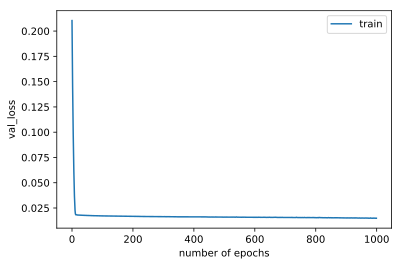

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

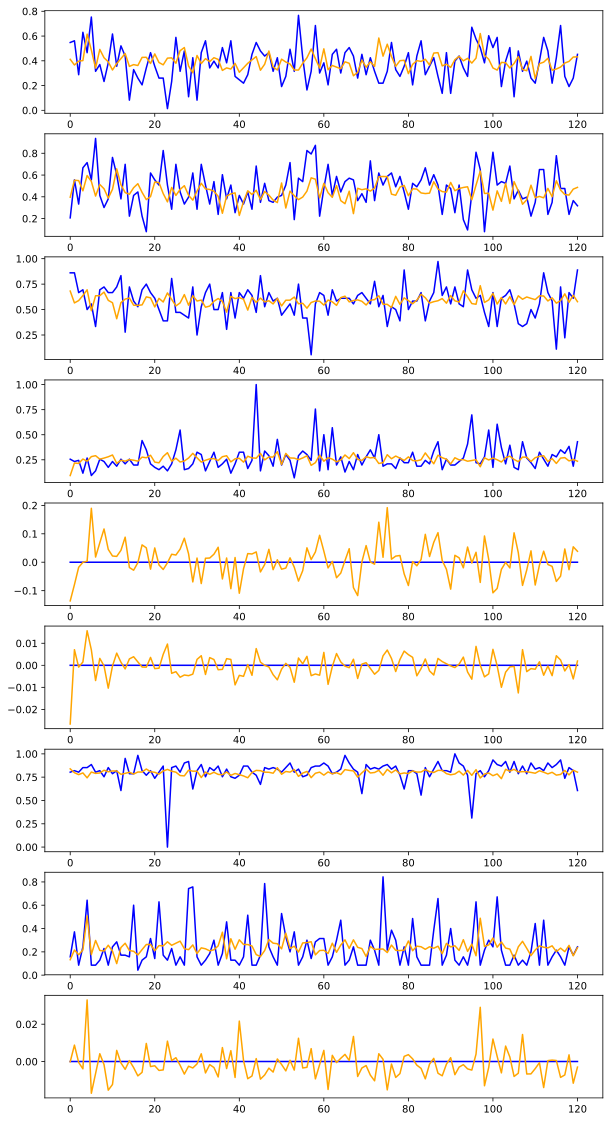

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 4.1196749e-01,  3.9615789e-01,  6.8179691e-01, ...,
         8.3883899e-01,  1.3228148e-01, -1.2715533e-04],
       [ 3.6620206e-01,  5.5230474e-01,  5.6528115e-01, ...,
         7.9758263e-01,  2.1539313e-01,  8.7993108e-03],
       [ 3.9697048e-01,  5.4897356e-01,  5.8836609e-01, ...,
         7.7680004e-01,  1.7511675e-01, -4.8420206e-04],
       ...,
       [ 3.9519486e-01,  4.1563842e-01,  5.7146615e-01, ...,
         7.7432525e-01,  2.5541875e-01,  3.5716258e-03],
       [ 4.3053827e-01,  4.7065961e-01,  6.4083481e-01, ...,
         8.2466650e-01,  1.6626638e-01, -1.1624966e-02],
       [ 4.3183181e-01,  4.8674271e-01,  5.7720345e-01, ...,
         8.0350494e-01,  2.3655629e-01, -2.9898025e-03]], dtype=float32)

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

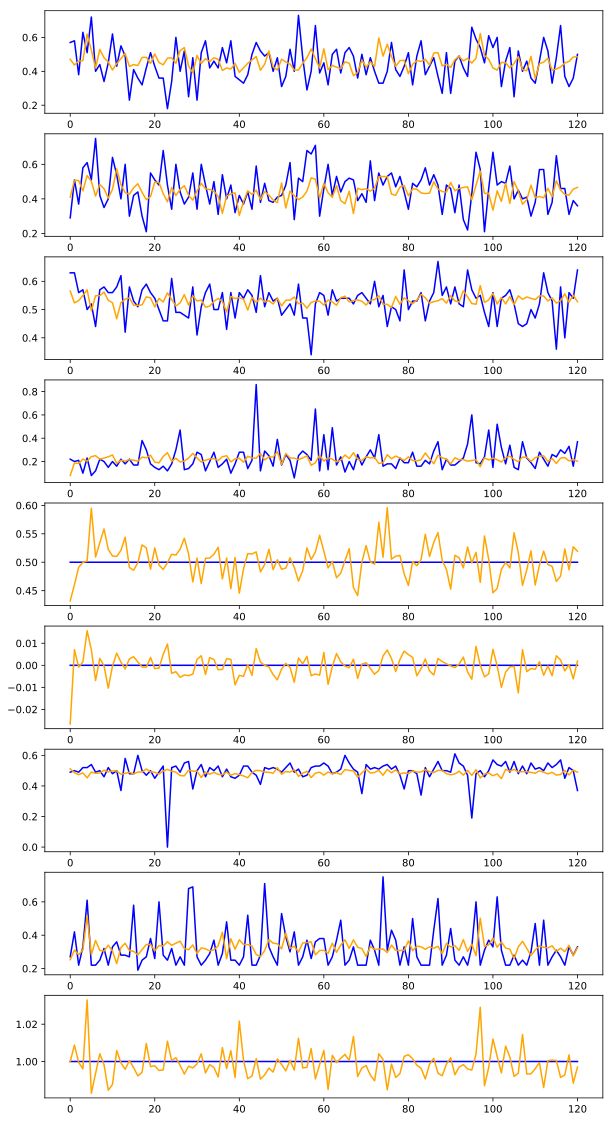

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 4.1196749e-01,  3.9615789e-01,  6.8179691e-01, ...,
         8.3883899e-01,  1.3228148e-01, -1.2715533e-04],
       [ 3.6620206e-01,  5.5230474e-01,  5.6528115e-01, ...,
         7.9758263e-01,  2.1539313e-01,  8.7993108e-03],
       [ 3.9697048e-01,  5.4897356e-01,  5.8836609e-01, ...,
         7.7680004e-01,  1.7511675e-01, -4.8420206e-04],
       ...,
       [ 3.9519486e-01,  4.1563842e-01,  5.7146615e-01, ...,
         7.7432525e-01,  2.5541875e-01,  3.5716258e-03],
       [ 4.3053827e-01,  4.7065961e-01,  6.4083481e-01, ...,
         8.2466650e-01,  1.6626638e-01, -1.1624966e-02],
       [ 4.3183181e-01,  4.8674271e-01,  5.7720345e-01, ...,
         8.0350494e-01,  2.3655629e-01, -2.9898025e-03]], dtype=float32)

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1.csv',index=False)